In [1]:
loc_path = 'C:/Users/132004/Downloads/datasets'
import pandas as pd
import numpy as np

In [2]:
uber_req = pd.read_csv(loc_path+'/Uber Request Data.csv')
uber_req.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
uber_req['Request timestamp']=pd.to_datetime(uber_req['Request timestamp'])
uber_req['Drop timestamp']=pd.to_datetime(uber_req['Drop timestamp'])

In [4]:
uber_req.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [5]:
uber_req['Journey length']=uber_req['Drop timestamp']-uber_req['Request timestamp']
uber_req.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Journey length
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,01:09:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,00:50:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,00:41:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31


In [6]:
uber_req['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

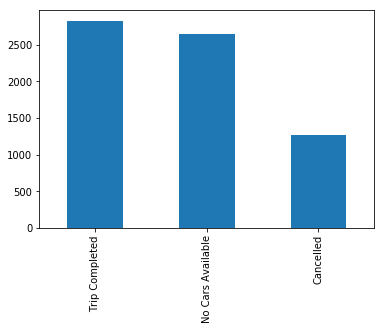

In [7]:
%matplotlib inline
uber_req['Status'].value_counts().plot(kind='bar')

In [8]:
def period(x):
    if(x<5):
        return("Pre Morning")
    elif((x>=5)&(x<=9)):
        return("Early Morning")
    elif((x>9)&(x<=12)):
        return("Pre Noon")
    elif((x>12)&(x<=17)):
        return("Day time")
    elif((x>17)&(x<=21)):
        return("Evening")
    else:
        return("Late Night")
uber_req['Request period']=uber_req["Request timestamp"].dt.hour.apply(period)
uber_req.to_csv('Uber_sheet_v2.csv')
uber_req.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Journey length,Request period
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,01:09:00,Pre Noon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,00:50:00,Day time
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,00:41:00,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,00:55:00,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,Early Morning


In [9]:
uber_req['Request period'].value_counts()

Early Morning    2103
Evening          1924
Day time         1044
Pre Noon          598
Pre Morning       578
Late Night        498
Name: Request period, dtype: int64

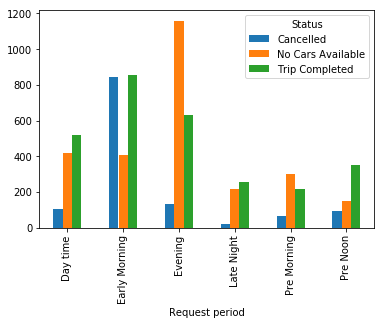

In [10]:
%matplotlib inline
pd.crosstab(uber_req['Request period'],uber_req['Status']).plot(kind='bar')

In [11]:
counts_reqperiod=pd.pivot_table(uber_req,index='Request period',columns='Status',values='Request id',aggfunc='count')
print(counts_reqperiod)


Status          Cancelled  No Cars Available  Trip Completed
Request period                                              
Day time              107                416             521
Early Morning         843                406             854
Evening               131               1160             633
Late Night             22                219             257
Pre Morning            65                299             214
Pre Noon               96                150             352


Status        Cancelled  No Cars Available  Trip Completed
Pickup point                                              
Airport             198               1713            1327
City               1066                937            1504


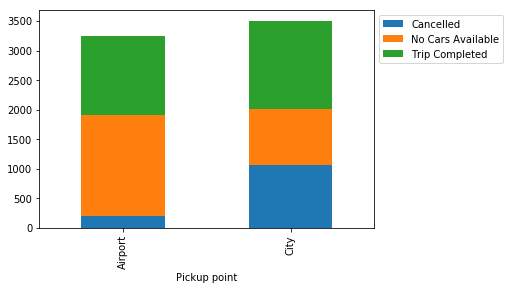

In [12]:
counts_pickup=pd.pivot_table(uber_req,index='Pickup point',columns='Status',values='Request id',aggfunc='count')
print(counts_pickup)
counts_pickup.plot(kind='bar',stacked=True).legend(loc='best',bbox_to_anchor=(1,1))

In [13]:
uber_req[['Pickup point','Request period']].apply(pd.value_counts)

,Pickup point,Request period
Airport,3238.0,NaN
City,3507.0,NaN
Day time,NaN,1044.0
Early Morning,NaN,2103.0
Evening,NaN,1924.0
Late Night,NaN,498.0
Pre Morning,NaN,578.0
Pre Noon,NaN,598.0


In [14]:
pd.crosstab(uber_req['Status'],uber_req['Pickup point'],normalize=True)

Pickup point,Airport,City
Status,,
Cancelled,0.029355,0.158043
No Cars Available,0.253966,0.138918
Trip Completed,0.196738,0.222980


In [15]:
pd.crosstab(uber_req['Status'],uber_req['Request period'],normalize=True)

Request period,Day time,Early Morning,Evening,Late Night,Pre Morning,Pre Noon
Status,,,,,,
Cancelled,0.015864,0.124981,0.019422,0.003262,0.009637,0.014233
No Cars Available,0.061675,0.060193,0.171979,0.032468,0.044329,0.022239
Trip Completed,0.077242,0.126612,0.093847,0.038102,0.031727,0.052187


In [16]:
req_by_pickup_period= pd.pivot_table(uber_req,columns='Status',index=('Pickup point','Request period'),values='Request id',aggfunc='count')
req_by_pickup_period

Status                       Cancelled  No Cars Available  Trip Completed
Pickup point Request period                                              
Airport      Day time               59                265             236
             Early Morning          23                 21             382
             Evening                87               1106             299
             Late Night              3                136             142
             Pre Morning             2                148             103
             Pre Noon               24                 37             165
City         Day time               48                151             285
             Early Morning         820                385             472
             Evening                44                 54             334
             Late Night             19                 83             115
             Pre Morning            63                151             111
             Pre Noon               72                113             187

C:\Users\132004\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


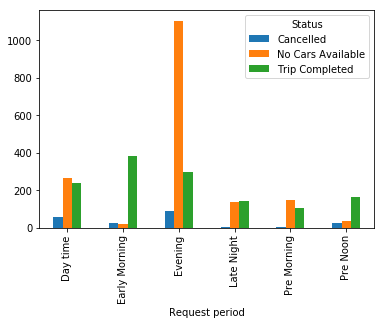

In [17]:
req_by_pickup_period.ix['Airport'].plot(kind='bar')

In [18]:
no_cars=uber_req[uber_req['Status']=='No Cars Available']['Request period'].value_counts()
print(no_cars)

Evening          1160
Day time          416
Early Morning     406
Pre Morning       299
Late Night        219
Pre Noon          150
Name: Request period, dtype: int64


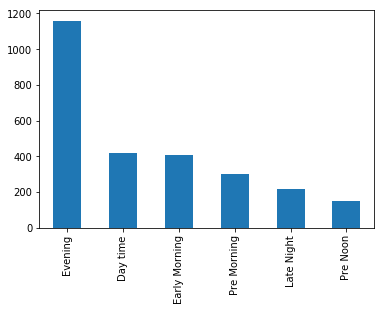

In [19]:
no_cars.plot(kind='bar')

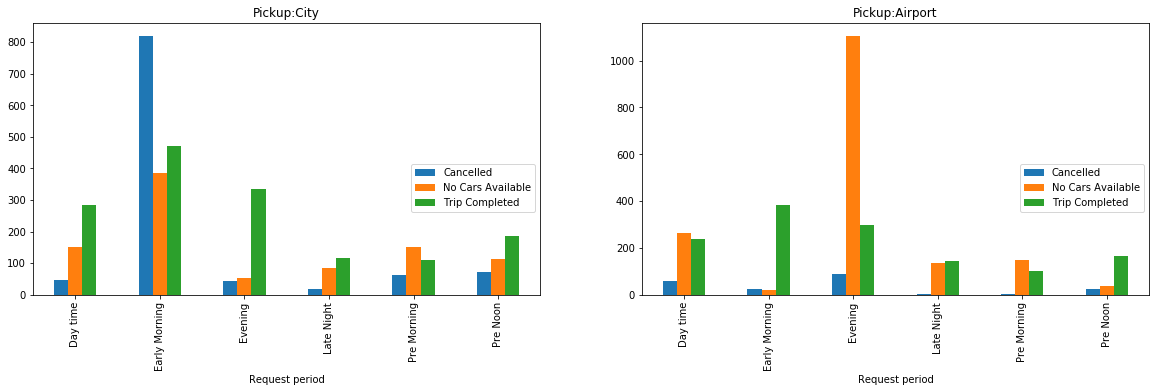

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace= 0.2)
a1=plt.subplot(1,2,1)
req_by_pickup_period.ix['City'].plot(kind='bar',ax=a1,title='Pickup:City').legend(loc='best',bbox_to_anchor=(1,0.5))
a2=plt.subplot(1,2,2)
req_by_pickup_period.loc['Airport'].plot(kind='bar',ax=a2,title='Pickup:Airport').legend(loc='best',bbox_to_anchor=(1,0.5))
#a2.bar(req_by_pickup_period.index,req_by_pickup_period['Airport'])

# Conclusions:

Most of the cancellations are happening for trips requested from city in Early morning time.
Demand-supply gap(No cars available) is most significant for trips requested from Airport in Evening(17:00hrs to 21:00 hrs) time.